In [31]:
import lsst.afw.image as afwImage
import lsst.geom as geom
import numpy as np
import os
import lsst.afw.image as afwImage
import matplotlib.pyplot as plt
import lsst.daf.persistence as dafPersist
import lsst.afw.geom as afwGeom
import lsst.afw.detection as afwDetection

%matplotlib inline

def plot(arr, title, cmap=None, vmin=None, vmax=None):
    plt.figure(figsize=(8,6))
    if vmin is None:
        vmin = np.percentile(arr[np.where(np.isfinite(arr))], 2)
    if vmax is None:
        vmax = np.percentile(arr[np.where(np.isfinite(arr))], 98)
    plt.imshow(arr, vmin=vmin, vmax=vmax,  origin='lower', cmap=cmap, interpolation='nearest')
    plt.title(title)
    plt.colorbar()

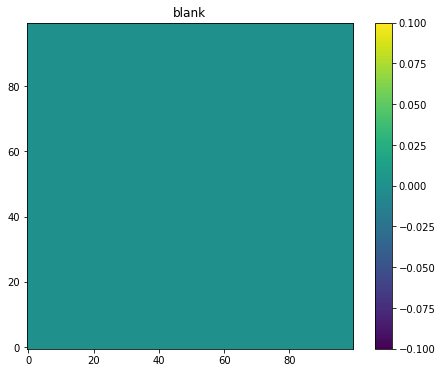

In [32]:
exp = afwImage.ExposureF(100,100)
plot(exp.image.array, "blank")

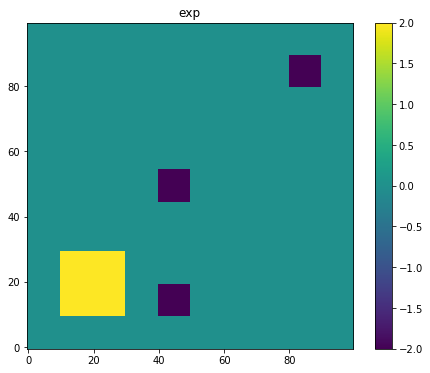

In [68]:
exp = afwImage.ExposureF(100,100)
exp.image[10:30,10:30] = 2.
exp.image[40:50,45:55] = -2.
exp.image[80:90,80:90] = -2.
exp.image[40:50,10:20] = -2.
plot(exp.image.array, "exp")

In [105]:
threshold = afwDetection.createThreshold(1.0, 'value', polarity=True)  # looks for pixels > 1
footprints = afwDetection.FootprintSet(exp.maskedImage, threshold).getFootprints()
for footprint in footprints:
    print(footprint.getBBox())
    print(footprint.getCentroid())

(minimum=(10, 10), maximum=(29, 29))
(19.5, 19.5)


In [106]:
threshold = afwDetection.createThreshold(1.0, 'value', polarity=False)  # looks for pixels < -1
footprints = afwDetection.FootprintSet(exp.maskedImage, threshold).getFootprints()
for footprint in footprints:
    print(footprint.getBBox())
    print(footprint.getCentroid())

(minimum=(40, 10), maximum=(49, 19))
(44.5, 14.5)
(minimum=(40, 45), maximum=(49, 54))
(44.5, 49.5)
(minimum=(80, 80), maximum=(89, 89))
(84.5, 84.5)


In [97]:
config = SourceDetectionTask.ConfigClass()
task = SourceDetectionTask(config=config)